# Modelos de 1, 3 y 5 factores

Fuente :  https://www.pwlcapital.com/wp-content/uploads/2020/12/Five-Factor-Investing-with-ETFs.pdf%20z

## 5 factor model

$$Stock = \sum_{t=1} \frac{E(d_{t+1})}{(1+r)^t}$$


*Miller Modigliani Proposition*

Los dividendos no importan, en realidad son solo dinero que tiene la empresa. De las ganancias vienen las inversiones en equipo, etc.

$$E(d_{t+1}) = E(Profits_{t+1} - dB_{t+1}) $$


Juntando todo
$$Stock = \sum_{t=1} \frac{E(Profits_{t+1} - dB_{t+1})}{(1+r)^t}$$

Escalando por el valor en libros:

$$\frac{Stock}{B_t} = \frac{\sum_{t=1} \frac{E(Profits_{t+1} - dB_{t+1})}{(1+r)^t}}{B_t}$$


$r$ es lo que imorta


1- *Value premium*: 1- Si dejamos todo constante, excepto $r$ y $\frac{stock}{B_t}$ significa que empresas con precio bajo necesariamente tienen mejor $r$

2-  *Profitability premium*: Si dejamos todo constante excepto $Profits_{t+1}$  y $r$ significa que las empresas que ganan más deben tener mejor $r$

3- *Investment premium* Si dejamos todo constante excepto $dB_{t+1}$ y $r$ entonces las compañias que gastan menos, tienen un mayor $r$


Instalar paquete

```pip install pandas_datareader```

In [3]:
# Descargar factores

import pandas_datareader.data as web
import datetime
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Definir las fechas de inicio y fin
start_date = datetime.datetime(1980, 1, 1)
end_date = datetime.datetime(2023, 12, 31)

# Descargar los factores Fama-French desde la web de Ken French
ff_factores = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)

#ff_factores.head()

<ipython-input-3-392201ecb89e>:17: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factores = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)
<ipython-input-3-392201ecb89e>:17: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ff_factores = web.DataReader("F-F_Research_Data_5_Factors_2x3", "famafrench", start_date, end_date)


In [4]:
factors_df = ff_factores[0] / 100
factors_df.index = factors_df.index.to_timestamp()
factors_df.head()

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1980-01-01,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0080
1980-02-01,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0089
1980-03-01,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,0.0121
1980-04-01,0.0397,0.0105,0.0106,-0.0210,0.0029,0.0126
1980-05-01,0.0526,0.0211,0.0038,0.0034,-0.0031,0.0081


In [5]:
#  Anualizados
factors_df.mean() * 12

Mkt-RF    0.084420
SMB       0.010577
HML       0.026720
RMW       0.046257
CMA       0.031368
RF        0.039264
dtype: float64

In [9]:
# Porcentaje de veces p
np.mean(factors_df["Mkt-RF"] > 0)

0.6231060606060606

In [10]:
np.mean(factors_df["SMB"] > 0)

0.4981060606060606

In [11]:
np.mean(factors_df["HML"] > 0)

0.5151515151515151

In [ ]:
# Escalar y transformar factores


In [12]:
# Descargar acciones
tickers = ['BRK-A', 'SPY', 'VB', 'VGT',
          'AAPL', 'AMZN', 'MSFT', 'WMT']
stock_data = yf.download(tickers, start_date, end_date, interval='1mo')['Adj Close']
rt = stock_data.pct_change().dropna()

[*********************100%%**********************]  8 of 8 completed


In [17]:
# Ejemplo merge
df1 = pd.DataFrame({
    'id': ['1A', '5B', '7B', '54'],
    'rendimiento': [12, 120, 50, 30]
})

df2 = pd.DataFrame({
    'id': ['1A', '5A', '8B', '54'],
    'rendimiento': [12, 120, 50, 30]
})

In [18]:
df1

,id,rendimiento
0,1A,12
1,5B,120
2,7B,50
3,54,30


In [19]:
df2

,id,rendimiento
0,1A,12
1,5A,120
2,8B,50
3,54,30


In [20]:
df3 = pd.merge(df1, df2, on='id')
df3

,id,rendimiento_x,rendimiento_y
0,1A,12,12
1,54,30,30


In [22]:
# Juntar datos en Date
fama_french_df = pd.merge(rt, factors_df, on='Date')
fama_french_df.head()

,AAPL,AMZN,BRK-A,MSFT,SPY,VB,VGT,WMT,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,,,,,,,,,
2004-03-01,0.130434,0.006278,-0.012698,-0.060309,-0.016693,0.008000,-0.025821,0.002183,-0.0132,0.0210,0.0027,0.0156,-0.0098,0.0009
2004-04-01,-0.046597,0.007394,0.000965,0.048134,-0.015482,-0.047024,-0.054312,-0.042920,-0.0183,-0.0201,-0.0310,0.0345,-0.0284,0.0008
2004-05-01,0.088439,0.112385,-0.047007,0.003828,0.017123,0.021029,0.049161,-0.022281,0.0117,-0.0038,-0.0025,-0.0118,0.0003,0.0006
2004-06-01,0.159658,0.121650,-0.000562,0.088830,0.014797,0.037724,0.020145,-0.055735,0.0186,0.0256,0.0118,0.0120,-0.0039,0.0008
2004-07-01,-0.006146,-0.284559,-0.019112,-0.002451,-0.028686,-0.061112,-0.084782,0.009715,-0.0406,-0.0295,0.0324,0.0532,-0.0166,0.0010


### Crea el CAPM con el S&P500, ¿Qué concluyes?




In [23]:
#spy_f = fama_french_df.copy()
#spy_f['spy_minus_rf'] = spy_f['SPY'] - spy_f['RF']

X = fama_french_df[['Mkt-RF']]
y = fama_french_df['SPY'] - fama_french_df["RF"]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)


0.9795757223367794

# Ahora con Berkshiere

In [24]:
# Accion minus RF
#brk_f = fama_french_df.copy()
#brk_f['brk_minus_rf'] = brk_f['BRK-A'] - brk_f['RF']

X = fama_french_df[['BRK-A']]
y = fama_french_df['SPY'] - fama_french_df["RF"]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)



0.3651001313634721

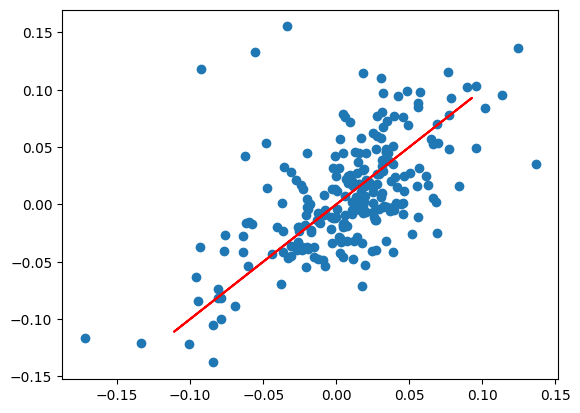

In [ ]:
# Plot CAPM
plt.scatter(X['Mkt-RF'], y)
plt.plot(X['preds'], predictions, 'red')

## Fama french con Berkshiere

In [28]:
# CAPM
X = fama_french_df[['Mkt-RF']]
y = fama_french_df['BRK-A'] - fama_french_df["RF"]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)

0.35688413427777976

In [26]:
# Fama french
X = fama_french_df[['Mkt-RF', 'SMB', 'HML']]
y = fama_french_df['BRK-A'] - fama_french_df["RF"]

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)


0.440680515679454

# 5 factor model con Berkshiere

In [30]:
fama_french_df.keys()

Index(['AAPL', 'AMZN', 'BRK-A', 'MSFT', 'SPY', 'VB', 'VGT', 'WMT', 'Mkt-RF',
       'SMB', 'HML', 'RMW', 'CMA', 'RF'],
      dtype='object')

In [31]:
# Accion minus RF
X = fama_french_df[['Mkt-RF', 'SMB', 'HML', 'CMA', 'RMW']]
y = fama_french_df['BRK-A'] - fama_french_df['RF']

model = LinearRegression().fit(X,y)
predictions = model.predict(X)
r2_score(y_pred=predictions, y_true=y)


0.4416793641919037

In [32]:
# Correr todos los modelos
def run_all_models(data, ticker):
    flag_data = data.copy()
    flag_data[ticker + '_minus_RF'] = data[ticker] - data['RF']
    y = flag_data[[ticker + '_minus_RF']]

    # CAPM
    X_capm = flag_data[['Mkt-RF']]
    model_capm = LinearRegression().fit(X_capm, y)
    prediction_capm = model_capm.predict(X_capm)
    r2_capm = r2_score(y_pred=prediction_capm, y_true=y)
    summary_capm = {str(X_capm.keys().values): list(model_capm.coef_[0])}

    # 3 factor model
    X_3factor = flag_data[['Mkt-RF', 'SMB', 'HML']]
    model_3factor = LinearRegression().fit(X_3factor, y)
    prediction_3factor = model_3factor.predict(X_3factor)
    r2_3factor = r2_score(y_pred=prediction_3factor, y_true=y)
    summary_3factor = {str(X_3factor.keys().values): list(model_3factor.coef_[0])}


    # 5 factor
    X_5factor = flag_data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]
    model_5factor = LinearRegression().fit(X_5factor, y)
    prediction_5factor = model_5factor.predict(X_5factor)
    r2_5factor = r2_score(y_pred=prediction_5factor, y_true=y)
    summary_5factor = {str(X_5factor.keys().values): list(model_5factor.coef_[0])}

    summary = {
        'CAPM': {'BETAS': summary_capm, 'R2': r2_capm},
        '3 factor': {'BETAS': summary_3factor, 'R2': r2_3factor},
        '5 factor': {'BETAS': summary_5factor, 'R2': r2_5factor}

    }
    return summary


In [34]:
# Como es con CAPM
run_all_models(fama_french_df, 'AMZN')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.2111336838323312]},
  'R2': 0.25896354576284575},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.3434767078214436,
    0.00405409789203004,
    -1.2145754047253654]},
  'R2': 0.38812567295839695},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.287888603779349,
    -0.11819254404437401,
    -0.969420174685956,
    -0.30396029797269913,
    -0.576782319161712]},
  'R2': 0.39734868791624345}}

## Crea un portafolio con 50% apple y 50% amazon
¿Qué concluyes?

In [37]:
fama_french_df['port_50_50'] = 0.5*fama_french_df['AAPL'] + 0.5*fama_french_df['AMZN']


run_all_models(fama_french_df, 'port_50_50')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.205787846514858]},
  'R2': 0.4153541809944924},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.3352364299394566,
    -0.12880396798848626,
    -0.910552294638852]},
  'R2': 0.5410016172844554},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.297774266063663,
    -0.11874485809082785,
    -0.7258376543376873,
    0.1344939291449721,
    -0.5133578737020111]},
  'R2': 0.5502507162302346}}

## Crea un portafolio con (1/3) apple, (1/3) amazon 6(1/3) microsoft
¿Qué concluyes?


In [40]:
fama_french_df['port_33_33_33'] = (1/3) * fama_french_df['AAPL'] + (1/3) * fama_french_df['AMZN'] + (1/3) * fama_french_df['MSFT']

In [41]:
run_all_models(fama_french_df, 'port_33_33_33')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.1101333237439983]},
  'R2': 0.5067627688767448},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.2511986601425054,
    -0.2884029446571216,
    -0.6828936633655502]},
  'R2': 0.6279524792866615},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.2181312449606805,
    -0.2910014405627328,
    -0.5222690894893013,
    0.07658485974386926,
    -0.4376588255436519]},
  'R2': 0.6372081366955458}}

## Crea un portafolio con (1/4) apple, (1/4) amazon, (1/4) microsoft, (1/4) Walmart
¿Qué concluyes?


In [42]:
fama_french_df['port_25_25_25_25'] = (1/4) * fama_french_df['AAPL'] + (1/4) * fama_french_df['AMZN'] + (1/4) * fama_french_df['MSFT'] + (1/4) * fama_french_df['WMT']

In [43]:
run_all_models(fama_french_df, 'port_25_25_25_25')

{'CAPM': {'BETAS': {"['Mkt-RF']": [0.9215698412758816]},
  'R2': 0.5391312462469755},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.0552386176519792,
    -0.33720513363439375,
    -0.5134993287219212]},
  'R2': 0.6649278196485944},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.0429460851271264,
    -0.3026709579417899,
    -0.4463006873460794,
    0.15878232832151692,
    -0.21056389946073883]},
  'R2': 0.6704319699162345}}

In [46]:
#Con VGT
run_all_models(fama_french_df, 'VGT')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.135885563511404]},
  'R2': 0.8284502758338679},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.18439018476618,
    -0.025794682426433846,
    -0.38813972798196816]},
  'R2': 0.8778882861367661},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.1720846912329614,
    -0.052790117753639426,
    -0.3338559493031674,
    -0.06704442310695607,
    -0.12777110401546596]},
  'R2': 0.879530566217175}}

In [47]:
#Con VB
run_all_models(fama_french_df, 'VB')

{'CAPM': {'BETAS': {"['Mkt-RF']": [1.1873300599032461]},
  'R2': 0.8928366862318168},
 '3 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML']": [1.0376325012753962,
    0.6233022907240637,
    0.06169561818370059]},
  'R2': 0.9699076081869744},
 '5 factor': {'BETAS': {"['Mkt-RF' 'SMB' 'HML' 'RMW' 'CMA']": [1.0311023389005125,
    0.612407684852904,
    0.0912261121109895,
    -0.022983839598089473,
    -0.07243077170126914]},
  'R2': 0.9703389886939323}}